# Exploratory Data Analysis - European Football Transfer Evaluation

In this notebook, we will be exploring the data that we cleaned in our [Data Wrangling Notebook](https://github.com/dvanheeswijk/Springboard/blob/master/Capstone%202/Capstone%202%20Data%20Wrangling%20-%207.6.ipynb). In the previous notebook, we combined data consisting of player stats, player info, club and league details, as well as transfers in many of Europe's leagues. We will now dive into these data sets and see if we can create a model for predicting a player's market value. First, let's import the libraries we will need throughout this EDA.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
data = pd.read_csv('football_data.csv')

data.head(3)

,player_id,player_name,season,club_name,minutes_played,goal_contributions,minutes_per_appearance,position,nationality_code,date_of_birth,height,market_value,fee,league
0,1,Jermaine Beckford,2005,Leeds United,137,0.0,27,S,JAM,1983-12-09,188.0,0.0,0.0,Other League
1,1,Jermaine Beckford,2006,Carlisle United,1979,12.0,73,S,JAM,1983-12-09,188.0,100000.0,0.0,Other League
2,1,Jermaine Beckford,2006,Carlisle United,1979,12.0,73,S,JAM,1983-12-09,188.0,100000.0,0.0,Other League


Initially, we see that there are some duplicate rows listed, so we will look to clean this up before we begin our search into the data.

In [4]:
data.drop_duplicates(inplace=True)
data_copy = data.copy()

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157323 entries, 0 to 698949
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   player_id               157323 non-null  int64  
 1   player_name             157323 non-null  object 
 2   season                  157323 non-null  int64  
 3   club_name               157323 non-null  object 
 4   minutes_played          157323 non-null  int64  
 5   goal_contributions      157323 non-null  float64
 6   minutes_per_appearance  157323 non-null  int64  
 7   position                157323 non-null  object 
 8   nationality_code        157323 non-null  object 
 9   date_of_birth           157323 non-null  object 
 10  height                  157323 non-null  float64
 11  market_value            77661 non-null   float64
 12  fee                     69582 non-null   float64
 13  league                  157323 non-null  object 
dtypes: float64(4), int64

In [5]:
data = data[data['market_value']>0]

We will now attempt to clean the data just a bit more before we start exploring the data that is not null. We start by checking if we can fill in some market values with fees, if a transfer occurred, but the market value was null for some reason.

In [6]:
data[(data['market_value'].isnull())&(data['fee'].notnull())]['fee'].unique()

array([], dtype=float64)

We see that the entries where market value is null and fee is not only has values of 0 for fee, meaning that we can't replace the market value at these points with the fee (as there was no transfer at this point). We will thus look to drop all entries with null values for market value and use this to make our analysis.

In [7]:
data = data[data['market_value'].notnull()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73775 entries, 1 to 698948
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   player_id               73775 non-null  int64  
 1   player_name             73775 non-null  object 
 2   season                  73775 non-null  int64  
 3   club_name               73775 non-null  object 
 4   minutes_played          73775 non-null  int64  
 5   goal_contributions      73775 non-null  float64
 6   minutes_per_appearance  73775 non-null  int64  
 7   position                73775 non-null  object 
 8   nationality_code        73775 non-null  object 
 9   date_of_birth           73775 non-null  object 
 10  height                  73775 non-null  float64
 11  market_value            73775 non-null  float64
 12  fee                     62656 non-null  float64
 13  league                  73775 non-null  object 
dtypes: float64(4), int64(4), object(6)
me

In [8]:
data['fee'].fillna(0, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73775 entries, 1 to 698948
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   player_id               73775 non-null  int64  
 1   player_name             73775 non-null  object 
 2   season                  73775 non-null  int64  
 3   club_name               73775 non-null  object 
 4   minutes_played          73775 non-null  int64  
 5   goal_contributions      73775 non-null  float64
 6   minutes_per_appearance  73775 non-null  int64  
 7   position                73775 non-null  object 
 8   nationality_code        73775 non-null  object 
 9   date_of_birth           73775 non-null  object 
 10  height                  73775 non-null  float64
 11  market_value            73775 non-null  float64
 12  fee                     73775 non-null  float64
 13  league                  73775 non-null  object 
dtypes: float64(4), int64(4), object(6)
me

Next, we will look to change as many of our data types to numeric so that we can have a better model for the data. We recognize that a few columns are categorical, namely 'nationality_code', 'position', 'club_name', and 'league'. Our DOB can be converted to a datetime object, so we will do that now.

In [9]:
from datetime import datetime

data['date_of_birth'] = pd.to_datetime(data['date_of_birth'])

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73775 entries, 1 to 698948
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   player_id               73775 non-null  int64         
 1   player_name             73775 non-null  object        
 2   season                  73775 non-null  int64         
 3   club_name               73775 non-null  object        
 4   minutes_played          73775 non-null  int64         
 5   goal_contributions      73775 non-null  float64       
 6   minutes_per_appearance  73775 non-null  int64         
 7   position                73775 non-null  object        
 8   nationality_code        73775 non-null  object        
 9   date_of_birth           73775 non-null  datetime64[ns]
 10  height                  73775 non-null  float64       
 11  market_value            73775 non-null  float64       
 12  fee                     73775 non-null  float

#### Exploring the Data

Our dependent variable will be market value, since we are concerned with finding the attributes that lead to the most profitable players to sell and the most value for production. Let's first see what the data says so far.

In [10]:
data.corr()

,player_id,season,minutes_played,goal_contributions,minutes_per_appearance,height,market_value,fee
player_id,1.000000,0.010398,-0.067887,-0.127426,-0.003837,-0.009481,-0.412221,-0.265111
season,0.010398,1.000000,-0.053060,0.008150,-0.020649,-0.006426,0.006442,-0.027874
minutes_played,-0.067887,-0.053060,1.000000,0.511098,0.504508,0.031086,0.075370,0.091964
goal_contributions,-0.127426,0.008150,0.511098,1.000000,0.131476,-0.093812,0.166466,0.155481
minutes_per_appearance,-0.003837,-0.020649,0.504508,0.131476,1.000000,0.157455,0.008744,0.031217
height,-0.009481,-0.006426,0.031086,-0.093812,0.157455,1.000000,-0.023270,-0.002547
market_value,-0.412221,0.006442,0.075370,0.166466,0.008744,-0.023270,1.000000,0.716666
fee,-0.265111,-0.027874,0.091964,0.155481,0.031217,-0.002547,0.716666,1.000000


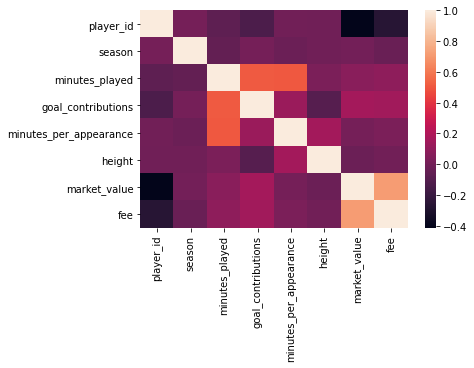

In [11]:
sns.heatmap(data.corr())

Text(0, 0.5, 'Market Value (Millions)')

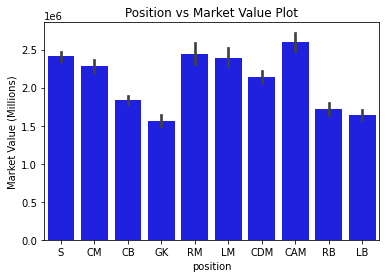

In [12]:
sns.barplot(x = data['position'], y = data['market_value'], color='blue')
plt.title('Position vs Market Value Plot')
plt.ylabel('Market Value (Millions)')

In [13]:
pos_market = pd.DataFrame(data.groupby('position')['market_value'].mean().reset_index())
pos_market

,position,market_value
0,CAM,2.596636e+06
1,CB,1.840318e+06
2,CDM,2.136967e+06
3,CM,2.279415e+06
4,GK,1.564133e+06
5,LB,1.634939e+06
6,LM,2.395086e+06
7,RB,1.720489e+06
8,RM,2.442881e+06
9,S,2.415787e+06


In [14]:
pos_market['position'].unique()

array(['CAM', 'CB', 'CDM', 'CM', 'GK', 'LB', 'LM', 'RB', 'RM', 'S'],
      dtype=object)

In [15]:
labels = ['GK', 'Wide Defender', 'Wide Attacker','Central Defender', 'Central Attacker']
numeric_pos = {'CAM':labels[4], 'CB':labels[3], 'CDM':labels[3], 'CM':labels[4], 'GK':labels[0], 'LB':labels[1], 'LM':labels[2], 'RB':labels[1], 
               'RM':labels[2], 'S':labels[4]}
data['num_position'] = data.replace({'position':numeric_pos})['position']

In [16]:
data['league'].unique()

array(['Other League', 'Ligue 1', 'Eredivisie', 'Liga NOS', 'Süper Lig',
       'Premier League', 'Premier Liga', 'Bundesliga', 'Serie A',
       'LaLiga', 'Jupiler Pro League'], dtype=object)

In [17]:
league_market = data.groupby('league')['market_value'].mean().sort_values().reset_index()
league_market

,league,market_value
0,Eredivisie,1.392050e+06
1,Süper Lig,1.405621e+06
2,Jupiler Pro League,1.424068e+06
3,Ligue 1,1.988217e+06
4,Other League,2.036085e+06
5,Premier Liga,2.221785e+06
6,Bundesliga,2.423471e+06
7,Liga NOS,2.691198e+06
8,Premier League,3.564263e+06
9,LaLiga,3.683385e+06


In [18]:
league_dict = {}
keys = list(league_market.league)
for i in keys:
    league_dict[i] = keys.index(i)
    
league_dict

{'Eredivisie': 0,
 'Süper Lig': 1,
 'Jupiler Pro League': 2,
 'Ligue 1': 3,
 'Other League': 4,
 'Premier Liga': 5,
 'Bundesliga': 6,
 'Liga NOS': 7,
 'Premier League': 8,
 'LaLiga': 9,
 'Serie A': 10}

In [19]:
data['num_league'] = data.replace({'league':league_dict})['league']
data.head()

,player_id,player_name,season,club_name,minutes_played,goal_contributions,minutes_per_appearance,position,nationality_code,date_of_birth,height,market_value,fee,league,num_position,num_league
1,1,Jermaine Beckford,2006,Carlisle United,1979,12.0,73,S,JAM,1983-12-09,188.0,100000.0,0.0,Other League,Central Attacker,4
8,1,Jermaine Beckford,2010,Everton FC,1794,17.0,44,S,JAM,1983-12-09,188.0,1500000.0,0.0,Other League,Central Attacker,4
9,1,Jermaine Beckford,2011,Everton FC,68,0.0,34,S,JAM,1983-12-09,188.0,4000000.0,3400000.0,Other League,Central Attacker,4
10,1,Jermaine Beckford,2011,Leicester City,2955,20.0,67,S,JAM,1983-12-09,188.0,4000000.0,3400000.0,Other League,Central Attacker,4
11,1,Jermaine Beckford,2012,Leicester City,1663,10.0,61,S,JAM,1983-12-09,188.0,1500000.0,0.0,Other League,Central Attacker,4


Since we have the DOB for each player, we should also make a column that records their age in years per season of data. That way, we can add it as a feature relative to market value.

In [20]:
data['age'] = data['season'] - pd.DatetimeIndex(data['date_of_birth']).year

In [21]:
data['age'].unique()

array([23, 27, 28, 29, 30, 31, 32, 34, 21, 20, 18, 19, 25, 24, 33, 36, 26,
       22, 37, 40, 42, 17, 35, 39, 38, 16, 41, 15], dtype=int64)

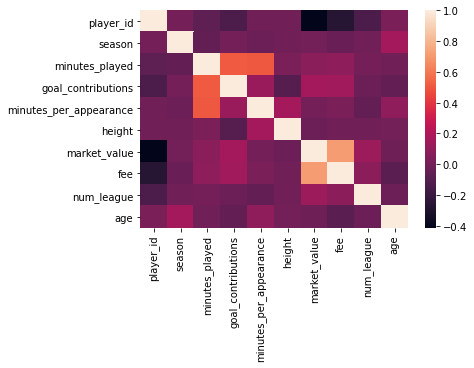

In [22]:
sns.heatmap(data.corr())

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

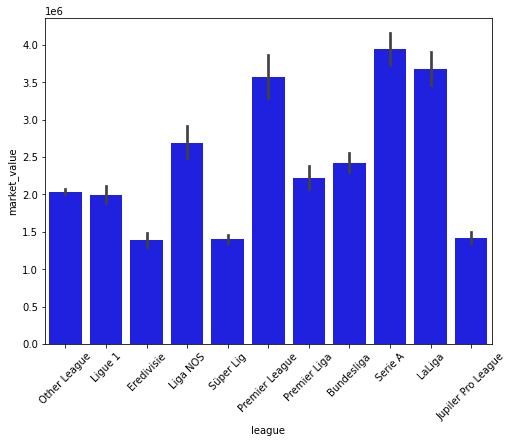

In [23]:
plt.figure(figsize=(8,6))
sns.barplot(x='league', y='market_value', data=data, color='blue')
plt.xticks(rotation=45)

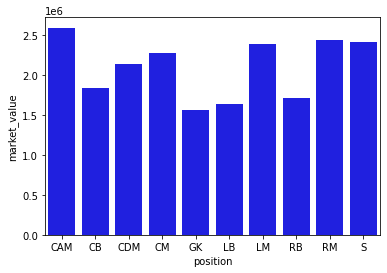

In [24]:
sns.barplot(x='position', y='market_value', data=pos_market, color='blue')

#### Positional analysis vs Market Value

One of the questions we want to answer is what positions are best value in regards to the market. 

Typically, we see that attackers are more expensive than defenders, who are more expensive than goalkeepers. We would like to explore this more, with regards to the differences between positional market value and the leagues that the players play in. 

Additionally, we would also like to map out the average ages per position in each league to give us a better understanding of the differences in market value per league. Let's start by observing the average market values per position in each league. To do this, we have merged the positions together into groups to make it easier to visualize.

Text(0, 0.5, 'Market value average in Millions')

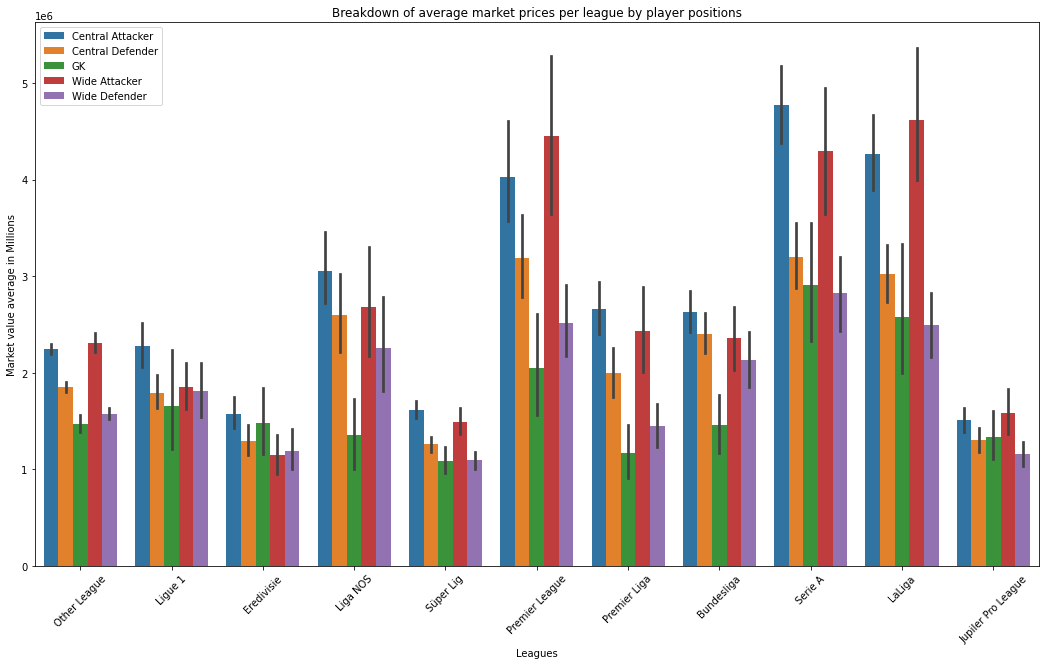

In [25]:
labels = ['GK', 'Wide Defender', 'Wide Attacker','Central Defender', 'Central Attacker']
plt.figure(figsize=(18,10))
sns.barplot(x='league',y='market_value',data=data, hue='num_position')
plt.xticks(rotation=45)
plt.legend(loc="upper left")

plt.title('Breakdown of average market prices per league by player positions')
plt.xlabel('Leagues')
plt.ylabel('Market value average in Millions')

Based on what we see above, we can see that attackers (central or wide) account for higher market values than defenders and goalkeepers. This is as we expected, since scoring and creating goals tend to be more valuable to a team than a defenders ability to stop goals. 

We see that, overall, the market value is highest for players in the English, Spanish, and Italian leagues on average. Each of these leagues have a difference in the average price for each position, however, with English goalkeepers being lower in market value than Spanish and Italian goalkeepers, for example.

Curiously, we can see that wide attackers from the Eredivisie (top league of Netherlands) are the lowest market value within their respective market. This could mean that there is a gap in performance from wide attackers, or it could mean that they are significantly undervalued compared to similar players in other leagues. 

#### League Analysis

Suppose we want to explore more of the three leagues that fall in the "cheaper" area of market value: Jupiler Pro League (Belgium top division), Eredivisie and Super Lig (Turkish top division). We can create two data sets that are specifically players in these leagues and see if we can find more information on whether these players are undervalued.

In [26]:
eredivisie = data[data['league'] == 'Eredivisie'].sort_values('num_position')
super_lig = data[data['league'] == 'Süper Lig'].sort_values('num_position')
jupiler = data[data['league'] == 'Jupiler Pro League'].sort_values('num_position')

print(eredivisie.shape)
print(super_lig.shape)
print(jupiler.shape)

(1212, 17)
(2560, 17)
(1732, 17)


We can see that there are more players in the Super Liga in our database than the other two leagues, so we will start by analyzing the data from this data set, first.

We will now instead create one dataset with only the players from these three leagues.

In [27]:
cheap_leagues = data[data['league'].isin(['Eredivisie', 'Süper Lig', 'Jupiler Pro League'])]

cheap_leagues.head(3)

,player_id,player_name,season,club_name,minutes_played,goal_contributions,minutes_per_appearance,position,nationality_code,date_of_birth,height,market_value,fee,league,num_position,num_league,age
274,18,Prince Gouano,2013,RKC Waalwijk,1732,0.0,86,CB,FRA,1993-12-24,186.0,500000.0,0.0,Eredivisie,Central Defender,0,20
286,18,Prince Gouano,2013,RKC Waalwijk,1732,0.0,86,CB,FRA,1993-12-24,186.0,200000.0,0.0,Eredivisie,Central Defender,0,20
298,18,Prince Gouano,2013,RKC Waalwijk,1732,0.0,86,CB,FRA,1993-12-24,186.0,200000.0,1450000.0,Eredivisie,Central Defender,0,20


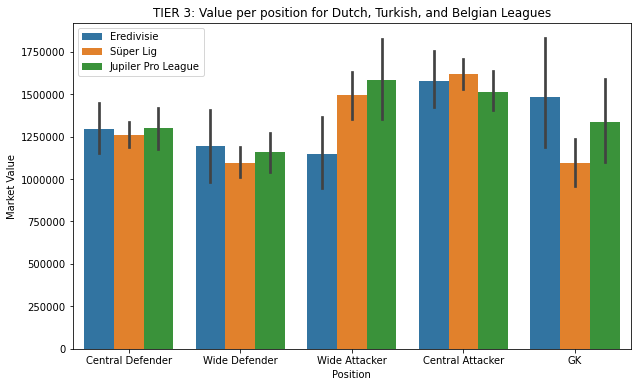

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x='num_position', y='market_value', hue='league', data = cheap_leagues)
plt.ticklabel_format(style='plain', axis='y')
plt.legend(loc='upper left')
plt.title('TIER 3: Value per position for Dutch, Turkish, and Belgian Leagues')
plt.ylabel('Market Value')
plt.xlabel('Position')

plt.savefig('market_tier_3.png')

We see that *Central Attackers*, *Wide Defenders* and *Central Defenders* are pretty similar, whereas *Wide Attackers* and *Goalkeepers* have significantly cheaper market values in the Eredivisie and Super Lig, respectively. We could therefore, on average, likely purchase wide attackers from the Eredivisie and goalkeepers from the Super Lig for less than their counterparts in other leagues. As for the other positions, any of these three leagues provide us cheaper options than most other leagues.

What about player age? Could that be a significant factor in the "cheaper" player value for these leagues. Let's explore what the average age for each position is within our cheapest leagues, then compare to the other leagues in Europe.

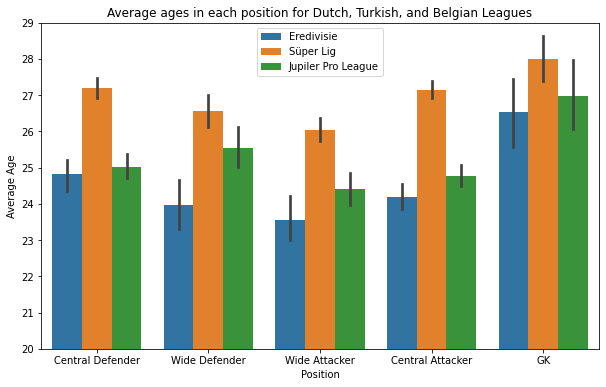

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(x='num_position', y='age', hue='league', data = cheap_leagues)
plt.ticklabel_format(style='plain', axis='y')
plt.legend(loc='upper center')
plt.title('Average ages in each position for Dutch, Turkish, and Belgian Leagues')
plt.ylabel('Average Age')
plt.ylim(20,29)
plt.xlabel('Position')

plt.savefig('age_tier_3.png')

We see immediately that the Eredivisie is younger on average at every position! This means that many of the players in this league are sold before they reach 26 years old, which could mean that clubs in the league tend to look to sell their players.

By contrast, the Super Lig is older in all categories, which could explain their relatively lower overall market value. We can compare the average age of players in Super Lig to the rest of Europe and reasonably expect the age to be on the higher end of the overall spectrum.

The Jupiler Pro League seems to be only slightly older than the Eredivisie, meaning there is a similar player pool to the Eredivisie, possibly.

The curious point is how young the Wide Attackers and Wide Defenders players are on average in the Eredivisie. It looks like teams sell these players early on, likely because they have good value early on.

Now, lets see how these average ages compare to the overall position ages in all European leagues.

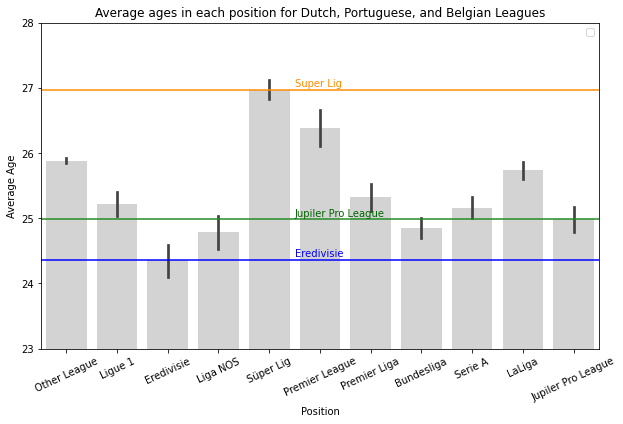

In [30]:
mean_age_ered = eredivisie['age'].mean()
mean_age_super_lig = super_lig['age'].mean()
mean_age_jup = jupiler['age'].mean()


plt.figure(figsize=(10,6))
sns.barplot(x='league', y='age', data = data, color='lightgray')
plt.ticklabel_format(style='plain', axis='y')
plt.legend([])
plt.title('Average ages in each position for Dutch, Portuguese, and Belgian Leagues')
plt.ylabel('Average Age')
plt.ylim(23,28)
plt.xlabel('Position')

plt.xticks(rotation=25)

plt.axhline(mean_age_ered, color='blue')
plt.axhline(mean_age_super_lig, c='darkorange')
plt.axhline(mean_age_jup, c='forestgreen')

plt.text(4.5, mean_age_ered+.05,'Eredivisie', color='blue')
plt.text(4.5, mean_age_jup+.05,'Jupiler Pro League', color='darkgreen')
plt.text(4.5, mean_age_super_lig+.05,'Super Lig', color='darkorange')

plt.savefig('overall_age_tier_3.png')

The Eredivisie is clearly the youngest league, and thus their cheaper values could be due to the players being sold before their "prime". We see also that Liga NOS (Portuguese top division) and Bundesliga (German top division) are both just under the same average age as the Jupiler Pro League, meaning that players in these divisions tend to be more expensive, but also slightly younger in age.

Super Lig is by far the oldest league by average age. The Premier League (England) and La Liga (Spain) are the next two leagues in regards to older average age.

What about the leagues in the middle or the leagues that are the highest average value? We will explore this in the following dataframes.

In [37]:
market_rank = data.groupby('league')['market_value'].mean().sort_values(ascending=False)
market_rank

league
Serie A               3.938294e+06
LaLiga                3.683385e+06
Premier League        3.564263e+06
Liga NOS              2.691198e+06
Bundesliga            2.423471e+06
Premier Liga          2.221785e+06
Other League          2.036085e+06
Ligue 1               1.988217e+06
Jupiler Pro League    1.424068e+06
Süper Lig             1.405621e+06
Eredivisie            1.392050e+06
Name: market_value, dtype: float64

In [38]:
middle = data[data['league'].isin(['Premier Liga', 'Bundesliga', 'Ligue 1', 'Liga NOS'])]

middle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6496 entries, 267 to 698922
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   player_id               6496 non-null   int64         
 1   player_name             6496 non-null   object        
 2   season                  6496 non-null   int64         
 3   club_name               6496 non-null   object        
 4   minutes_played          6496 non-null   int64         
 5   goal_contributions      6496 non-null   float64       
 6   minutes_per_appearance  6496 non-null   int64         
 7   position                6496 non-null   object        
 8   nationality_code        6496 non-null   object        
 9   date_of_birth           6496 non-null   datetime64[ns]
 10  height                  6496 non-null   float64       
 11  market_value            6496 non-null   float64       
 12  fee                     6496 non-null   floa

In [49]:
middle[middle['league']=='Premier Liga'].head(3)

,player_id,player_name,season,club_name,minutes_played,goal_contributions,minutes_per_appearance,position,nationality_code,date_of_birth,height,market_value,fee,league,num_position,num_league,age
712,26,Pavel Mogilevets,2013,Rubin Kazan,893,4.0,81,CM,RUS,1993-01-25,183.0,250000.0,0.0,Premier Liga,Central Attacker,5,20
730,26,Pavel Mogilevets,2014,Rubin Kazan,420,0.0,84,CM,RUS,1993-01-25,183.0,1500000.0,0.0,Premier Liga,Central Attacker,5,21
747,26,Pavel Mogilevets,2014,Rubin Kazan,420,0.0,84,CM,RUS,1993-01-25,183.0,1500000.0,0.0,Premier Liga,Central Attacker,5,21


In [39]:
plt.close()

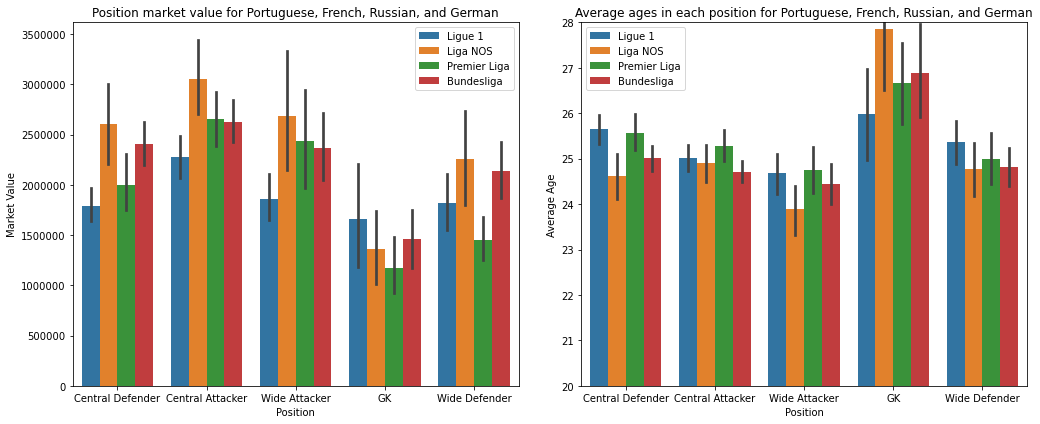

In [48]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)

sns.barplot(x='num_position', y='market_value', hue='league', data = middle)
plt.ticklabel_format(style='plain', axis='y')
plt.legend(loc='upper right')
plt.title('Position market value for Portuguese, French, Russian, and German')
plt.ylabel('Market Value')
plt.xlabel('Position')

plt.subplot(1,2,2)

sns.barplot(x='num_position', y='age', hue='league', data = middle)
plt.ticklabel_format(style='plain', axis='y')
plt.legend(loc='upper left')
plt.title('Average ages in each position for Portuguese, French, Russian, and German')
plt.ylabel('Average Age')
plt.ylim(20,28)
plt.xlabel('Position')

plt.tight_layout()


plt.savefig('age_tier_2.png')



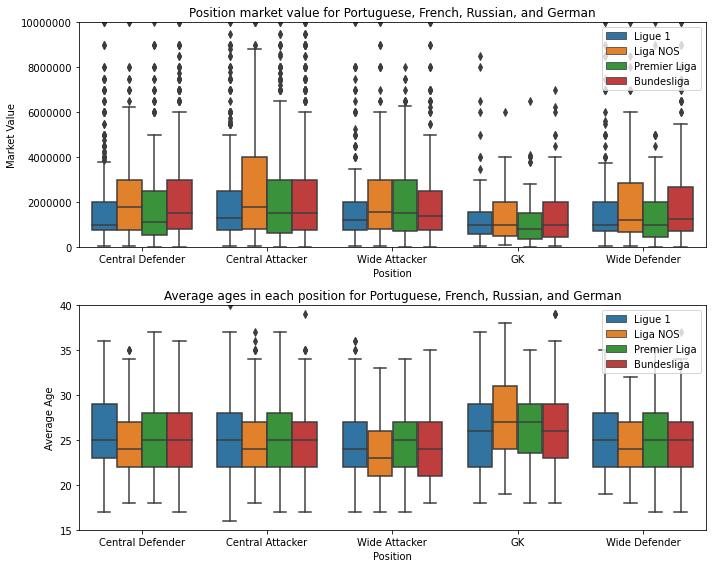

In [77]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)

sns.boxplot(x='num_position', y='market_value', hue='league', data = middle)
plt.ticklabel_format(style='plain', axis='y')
plt.legend(loc='upper right')
plt.title('Position market value for Portuguese, French, Russian, and German')
plt.ylabel('Market Value')
plt.xlabel('Position')
plt.ylim(0,10000000)

plt.subplot(2,1,2)

sns.boxplot(x='num_position', y='age', hue='league', data = middle)
plt.ticklabel_format(style='plain', axis='y')
plt.legend(loc='upper right')
plt.title('Average ages in each position for Portuguese, French, Russian, and German')
plt.ylabel('Average Age')
plt.ylim(15,40)
plt.xlabel('Position')

plt.tight_layout()

In [32]:
expensive = data[data['league'].isin(['Serie A', 'LaLiga', 'Premier League'])]
expensive.head()

,player_id,player_name,season,club_name,minutes_played,goal_contributions,minutes_per_appearance,position,nationality_code,date_of_birth,height,market_value,fee,league,num_position,num_league,age
501,20,Craig Gardner,2009,Aston Villa,59,0.0,29,CM,GBR,1986-11-25,176.0,2000000.0,3500000.0,Premier League,Central Attacker,8,23
834,27,Keith Andrews,2005,Hull City,2054,0.0,79,CM,IRL,1980-09-13,183.0,100000.0,0.0,Premier League,Central Attacker,8,25
839,27,Keith Andrews,2006,Hull City,3319,9.0,82,CM,IRL,1980-09-13,183.0,100000.0,0.0,Premier League,Central Attacker,8,26
1046,29,Ragnar Klavan,2018,Cagliari Calcio,810,0.0,81,CB,EST,1985-10-30,187.0,3500000.0,1300000.0,Serie A,Central Defender,10,33
1308,32,Jesús Fernández,2015,Granada CF,90,0.0,90,GK,ESP,1988-06-11,190.0,1000000.0,0.0,LaLiga,GK,9,27


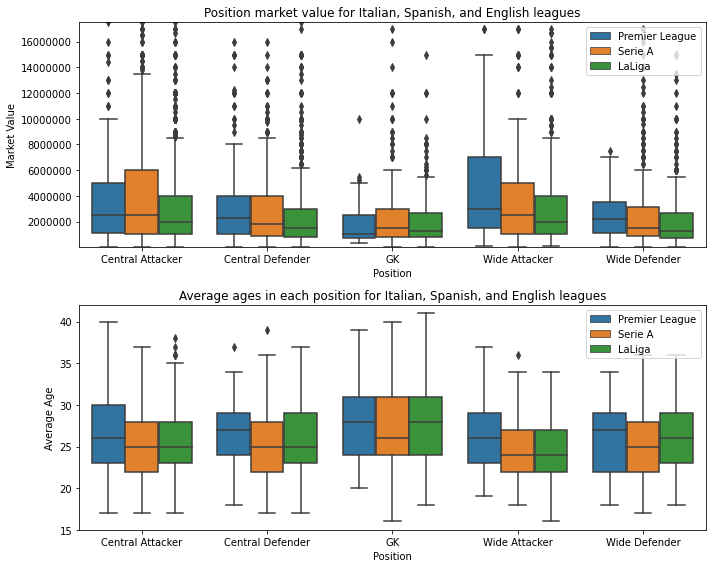

In [33]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)

sns.boxplot(x='num_position', y='market_value', hue='league', data = expensive)
plt.ticklabel_format(style='plain', axis='y')
plt.legend(loc='upper right')
plt.title('Position market value for Italian, Spanish, and English leagues')
plt.ylabel('Market Value')
plt.xlabel('Position')
plt.ylim(1000,17500000)

plt.subplot(2,1,2)

sns.boxplot(x='num_position', y='age', hue='league', data = expensive)
plt.ticklabel_format(style='plain', axis='y')
plt.legend(loc='upper right')
plt.title('Average ages in each position for Italian, Spanish, and English leagues')
plt.ylabel('Average Age')
plt.ylim(15,42)
plt.xlabel('Position')

plt.tight_layout()

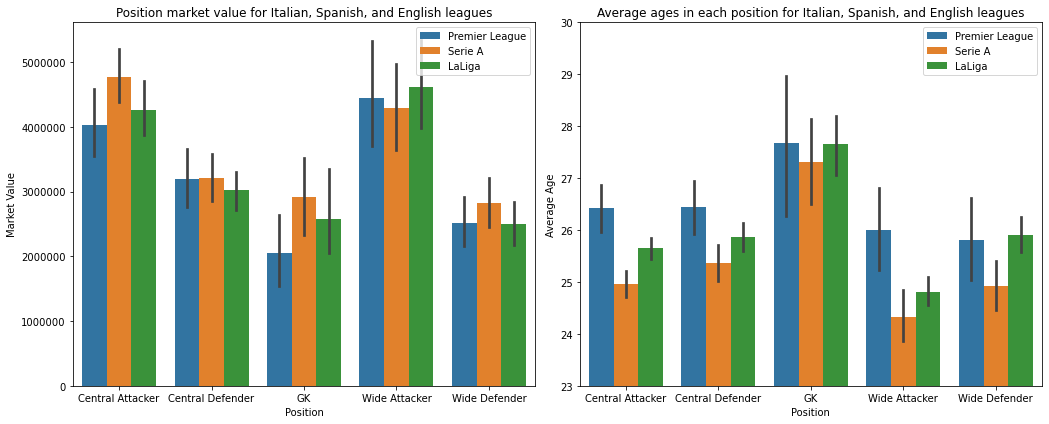

In [50]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)

sns.barplot(x='num_position', y='market_value', hue='league', data = expensive)
plt.ticklabel_format(style='plain', axis='y')
plt.legend(loc='upper right')
plt.title('Position market value for Italian, Spanish, and English leagues')
plt.ylabel('Market Value')
plt.xlabel('Position')

plt.subplot(1,2,2)

sns.barplot(x='num_position', y='age', hue='league', data = expensive)
plt.ticklabel_format(style='plain', axis='y')
plt.legend(loc='upper right')
plt.title('Average ages in each position for Italian, Spanish, and English leagues')
plt.ylabel('Average Age')
plt.ylim(23,30)
plt.xlabel('Position')

plt.tight_layout()

plt.savefig('age_tier_1.png')


Our next stage will be to tidy up the data into a working mode, creating dummy variables for our catergorical data and engineering features from all the information. This will be done in the next notebook: [Notebook 3 - Preprocessing and Training](https://github.com/dvanheeswijk/Springboard/blob/master/Capstone%202/Capstone%202%20-%20Preprocessing%20and%20Training.ipynb)

For this notebook, we will go back to our data set before we removed the rows with no market value. This is because we can update these rows in the next section with either a function or use a model to predict the market values based on the training data created from the rows with nonnull market values.

In [81]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157323 entries, 0 to 698949
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   player_id               157323 non-null  int64  
 1   player_name             157323 non-null  object 
 2   season                  157323 non-null  int64  
 3   club_name               157323 non-null  object 
 4   minutes_played          157323 non-null  int64  
 5   goal_contributions      157323 non-null  float64
 6   minutes_per_appearance  157323 non-null  int64  
 7   position                157323 non-null  object 
 8   nationality_code        157323 non-null  object 
 9   date_of_birth           157323 non-null  object 
 10  height                  157323 non-null  float64
 11  market_value            77661 non-null   float64
 12  fee                     69582 non-null   float64
 13  league                  157323 non-null  object 
dtypes: float64(4), int64

In [41]:
data_copy.head()

,player_id,player_name,season,club_name,minutes_played,goal_contributions,minutes_per_appearance,position,nationality_code,date_of_birth,height,market_value,fee,league,num_position,num_league,age
1,1,Jermaine Beckford,2006,Carlisle United,1979,12.0,73,S,JAM,1983-12-09,188.0,100000.0,0.0,Other League,Central Attacker,4,23
8,1,Jermaine Beckford,2010,Everton FC,1794,17.0,44,S,JAM,1983-12-09,188.0,1500000.0,0.0,Other League,Central Attacker,4,27
9,1,Jermaine Beckford,2011,Everton FC,68,0.0,34,S,JAM,1983-12-09,188.0,4000000.0,3400000.0,Other League,Central Attacker,4,28
10,1,Jermaine Beckford,2011,Leicester City,2955,20.0,67,S,JAM,1983-12-09,188.0,4000000.0,3400000.0,Other League,Central Attacker,4,28
11,1,Jermaine Beckford,2012,Leicester City,1663,10.0,61,S,JAM,1983-12-09,188.0,1500000.0,0.0,Other League,Central Attacker,4,29


In [83]:
data_copy.to_csv('football_data_eda.csv')